In [25]:
import csv
import json
import os
import sys
import matplotlib.pyplot as plt
import networkx as nx
import re
import numpy as np
import pandas as pd
from matplotlib import mlab




In [26]:
def GetFileName(fpath):
    #os.path.split（）返回文件的路径和文件名
    dirname,filename_full=os.path.split(fpath)
    #os.path.splitext()将文件名和扩展名分开
    filename,extension=os.path.splitext(filename_full)
    
    return filename


In [33]:
def DrawNetGraph(fpath,fname,save_png_dir,net_type):
    save_png_path = os.path.join(save_png_dir, fname+'.png')
    if net_type == "DiGraph":
        D = nx.read_weighted_edgelist(fpath, create_using=nx.DiGraph(),delimiter=",", nodetype=int)            
        e5 = [(u, v) for (u, v, d) in D.edges(data=True) if d['weight'] >= 0.9]
        e4 = [(u, v) for (u, v, d) in D.edges(data=True) if (0.9 > d['weight'] >= 0.8)]
        e3 = [(u, v) for (u, v, d) in D.edges(data=True) if (0.8 > d['weight'] >= 0.7)]
        e2 = [(u, v) for (u, v, d) in D.edges(data=True) if (0.7 > d['weight'] >= 0.6)]
        e1 = [(u, v) for (u, v, d) in D.edges(data=True) if (0.6 > d['weight'] >= 0.5)]

    pos = nx.circular_layout(D)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(D, pos, node_size=200)

    # edges
    nx.draw_networkx_edges(D, pos, edgelist=e5, width=2)
    nx.draw_networkx_edges(D, pos, edgelist=e4, width=1, alpha=1, edge_color='b')
    nx.draw_networkx_edges(D, pos, edgelist=e3, width=0.5, alpha=0.5, edge_color='b')
    nx.draw_networkx_edges(D, pos, edgelist=e2, width=0.5, alpha=0.1, edge_color='b')
    nx.draw_networkx_edges(D, pos, edgelist=e1, width=0.1, alpha=0.1, edge_color='b')

    # labels
    nx.draw_networkx_labels(D, pos, font_size=6, font_family='sans-serif')

    plt.axis('off')
    plt.savefig(save_png_path,dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
    plt.clf()
    

In [35]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""
"""
#DEMO code
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 4))

# generate some random test data

all_data = [np.random.normal(0, std, 100) for std in range(6, 20)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')
    for i in range(len(all_data)-1):
        ax.plot([i+1, i+2], [all_data[i][-1], all_data[i+1][0]])

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()
"""

"\n#DEMO code\nimport matplotlib.pyplot as plt\nimport numpy as np\n%matplotlib inline\n#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 4))\n\n# generate some random test data\n\nall_data = [np.random.normal(0, std, 100) for std in range(6, 20)]\n\n# plot violin plot\naxes[0].violinplot(all_data,\n                   showmeans=False,\n                   showmedians=True)\naxes[0].set_title('violin plot')\n\n# plot box plot\naxes[1].boxplot(all_data)\naxes[1].set_title('box plot')\n\n# adding horizontal grid lines\nfor ax in axes:\n    ax.yaxis.grid(True)\n    ax.set_xticks([y+1 for y in range(len(all_data))])\n    ax.set_xlabel('xlabel')\n    ax.set_ylabel('ylabel')\n    for i in range(len(all_data)-1):\n        ax.plot([i+1, i+2], [all_data[i][-1], all_data[i+1][0]])\n\n# add x-tick labels\nplt.setp(axes, xticks=[y+1 for y in range(len(all_data))],\n         xticklabels=['x1', 'x2', 'x3', 'x4'])\nplt.show()\n"

In [3]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np
from math import ceil,sin
%matplotlib inline
def the_time_plot(ax, all_data, color, group_num, title, ylim_range=None):

    group_data = [all_data[i*group_num:min((i+1)*group_num, len(all_data))] for i in range(int(ceil(len(all_data)*1.0/group_num)))]
    #all_data = [np.random.normal(std*5, std, 100) for std in range(6, 20)]

    # plot violin plot
    # plot box plot
    N = len(all_data)
    M = len(group_data)
    ax.plot(list(range(N)), all_data, alpha=0.3,color=color, label=title)
    ax.set_xticks([y+1 for y in range(N)])

    g_x = [(i+0.5)*group_num for i in range(M)]
    g_max = [np.max(group_data[i]) for i in range(M)]
    g_avg = [np.average(group_data[i]) for i in range(M)]
    g_med = [np.median(group_data[i]) for i in range(M)]
    g_std = [np.std(group_data[i]) for i in range(M)]
    g_min = [np.min(group_data[i]) for i in range(M)]
    g_p25 = [np.percentile(group_data[i], 25) for i in range(M)]
    g_p75 = [np.percentile(group_data[i], 75) for i in range(M)]
    g_std_u = [g_avg[i] + g_std[i] for i in range(M)]
    g_std_d = [g_avg[i] - g_std[i] for i in range(M)]
#    g_orgs = [g_min, g_p25, g_med, g_p75, g_max]
    g_orgs = [g_avg]
    g_alpha = [0.8, 0.4, 0.4,0.2]
    g_color = [color] * 4
    if len(g_orgs) <= 1:
        for i in range(len(g_orgs)):
            ax.plot(g_x, g_orgs[i], alpha=g_alpha[i], color=g_color[i])
    else:
        for i in range(len(g_orgs)-1):
            ax.fill_between(g_x, g_orgs[i], g_orgs[i+1], alpha=g_alpha[i], color=g_color[i])
    ax.set_xticklabels(["%i"%i for i in range(M)], horizontalalignment='left')
    ax.set_xticks([i*group_num for i in range(M+1)])
    if ylim_range is not None:
        ax.set_ylim(ylim_range) # 设置坐标轴范围
    # adding horizontal grid lines

def draw_concate(all_datas, group_num, colors,titles, save_fig_path=None, ylim_ranges=None):
    Ln = len(all_datas)
    fig, axs = plt.subplots(nrows=Ln, ncols=1,figsize=(16, 5*Ln))
    for i in range(Ln):
        ylim_range = None
        if ylim_ranges is not None:
            ylim_range = ylim_ranges[i]
        the_time_plot(axs[i], all_datas[i], colors[i], group_num, titles[i],ylim_range)
        axs[i].set_title(titles[i])
        axs[i].legend()
        axs[i].yaxis.grid(True)
        axs[i].xaxis.grid(True)
    if save_fig_path is not None:
        plt.savefig(save_fig_path)
    #plt.show()

def draw_lay(all_datas, group_num, colors,titles, save_fig_path=None, ylim_ranges=None):
    Ln = len(all_datas)
    fig, axs = plt.subplots(figsize=(16, 9))
    for i in range(Ln):
        ylim_range = None
        if ylim_ranges is not None:
            ylim_range = ylim_ranges[i]
        the_time_plot(axs, all_datas[i], colors[i],group_num, titles[i], ylim_range)
        axs.yaxis.grid(True)
        axs.xaxis.grid(True)
        axs.legend()
    if save_fig_path is not None:
        plt.savefig(save_fig_path)
    #plt.show()
    

#all_data = [[np.random.normal(i,(256-i)*0.5,1)[0] for i in range(1, 256)],
#            [np.random.normal(256 - i,20*(sin(i)+2),1)[0] for i in range(1, 256)]]
#group_num = 16
#draw_concate(all_data, group_num, ['blue', 'red'],['a','b'])
#draw_lay(all_data, group_num, ['blue', 'red'],['a','b'])

In [4]:
import csv
def select_data_from_leadershipbill(bill_csv=None, bill_path=None, agent_id=None, select_key=None):
    if bill_csv is None and bill_path is None:
        print("bill_csv and bill_path cannot be None as same time!")
        return None
    if bill_csv is None:
        with open(bill_path, "r") as fp:
            bill_csv = [row for row in csv.DictReader(fp)]
    bill_dict = {}
    for row in bill_csv:
        ti, ai = int(row['T']), int(row['agent_no'])
        if ti not in bill_dict:
            bill_dict[ti] = {}
        bill_dict[ti][ai] = row
    result_list = []
    for ti in bill_dict:
        if agent_id == 'sum':
            result_list.append((ti, sum([int(bill_dict[ti][ai][select_key]) for ai in bill_dict[ti]])))
        else:
            result_list.append((ti, int(bill_dict[ti][agent_id][select_key])))
    result_list = sorted(result_list, key=lambda row: row[0])
    return [row[1] for row in result_list]


In [12]:
#选择后处理batch
NA,N,K,P = 16, 5, 3, 7
T,Ts = 256,8
group_num = Ts
batch_name = "20181224-142810"

batch_dir = "../../result/batch_{batch_name}_NA{NA}_N{N}_K{K}_P{P}_T{T}_Ts{Ts}".format(batch_name=batch_name,
                                                                                                 NA=NA, N=N, K=K, P=P,
                                                                                                T=T, Ts=Ts)
print(batch_dir)
with open(os.path.join(batch_dir, "exp_list.csv"), "r") as fp:
    exp_name_list = [row.strip() for row in fp.readlines()]
    print(exp_name_list)

../../result/batch_20181224-142810_NA16_N5_K3_P7_T256_Ts8
['mul_20181224-142810_exp0']


[finish]:agent0 leadership img
[finish]:agent1 leadership img
[finish]:agent2 leadership img
[finish]:agent3 leadership img
[finish]:agent4 leadership img
[finish]:agent5 leadership img
[finish]:agent6 leadership img
[finish]:agent7 leadership img
[finish]:agent8 leadership img
[finish]:agent9 leadership img
[finish]:agent10 leadership img
[finish]:agent11 leadership img
[finish]:agent12 leadership img
[finish]:agent13 leadership img
[finish]:agent14 leadership img
[finish]:agent15 leadership img
[finish]:agentsum leadership img


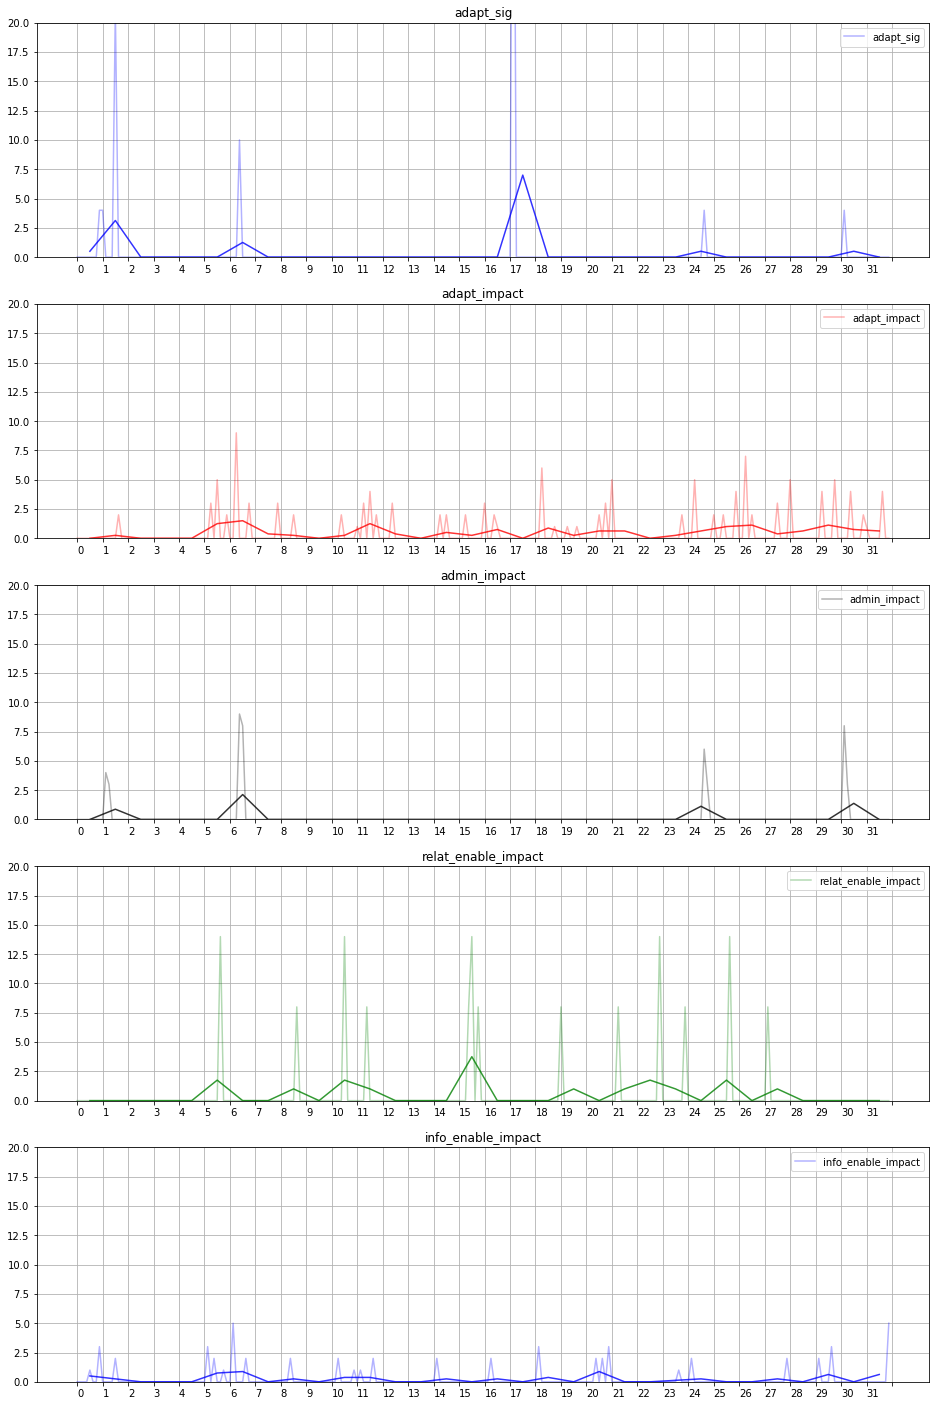

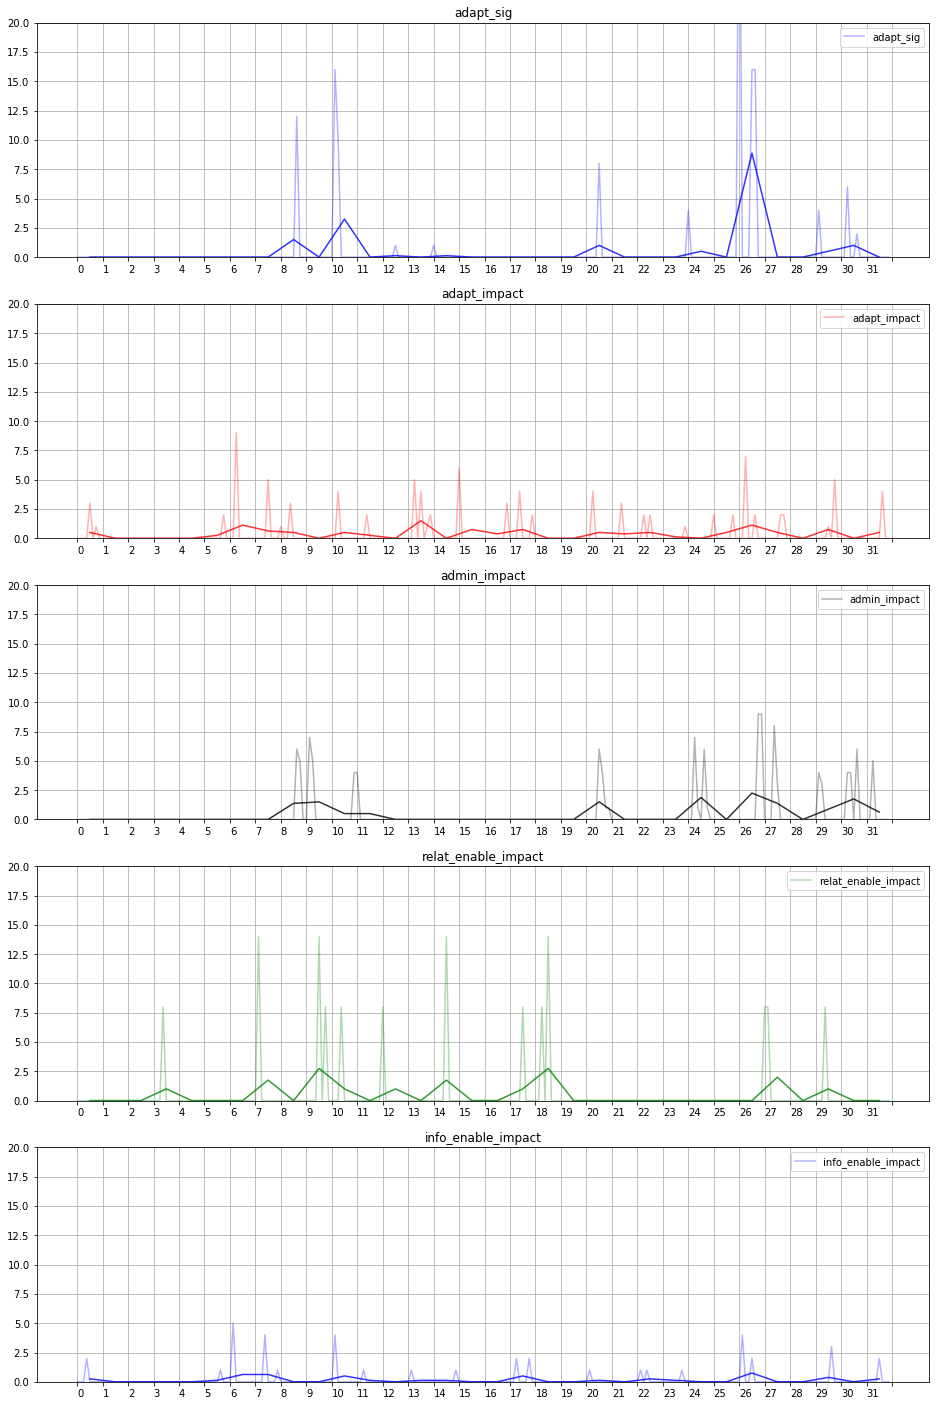

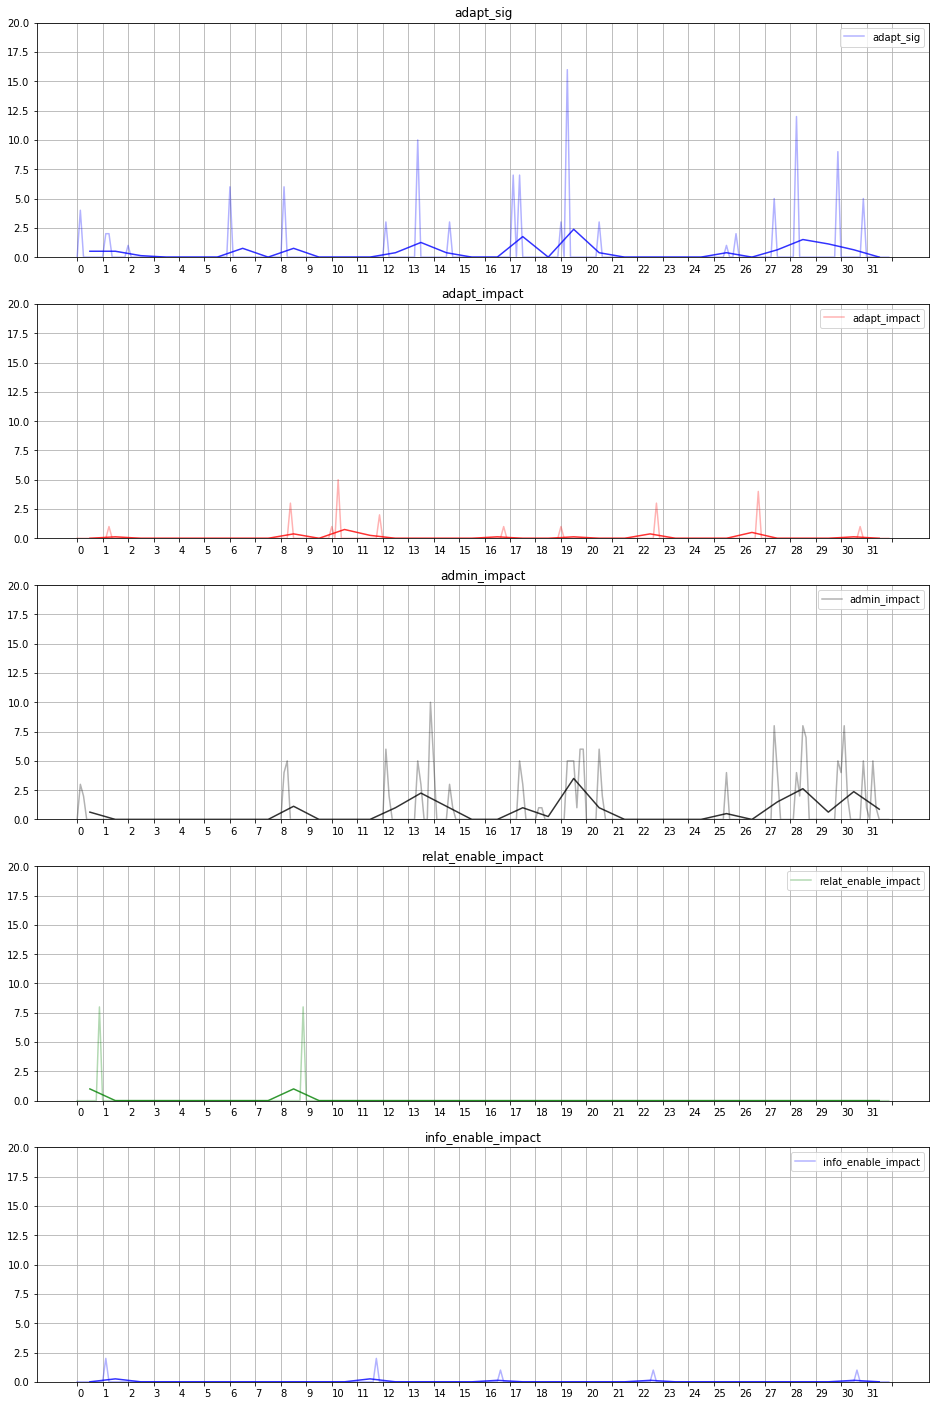

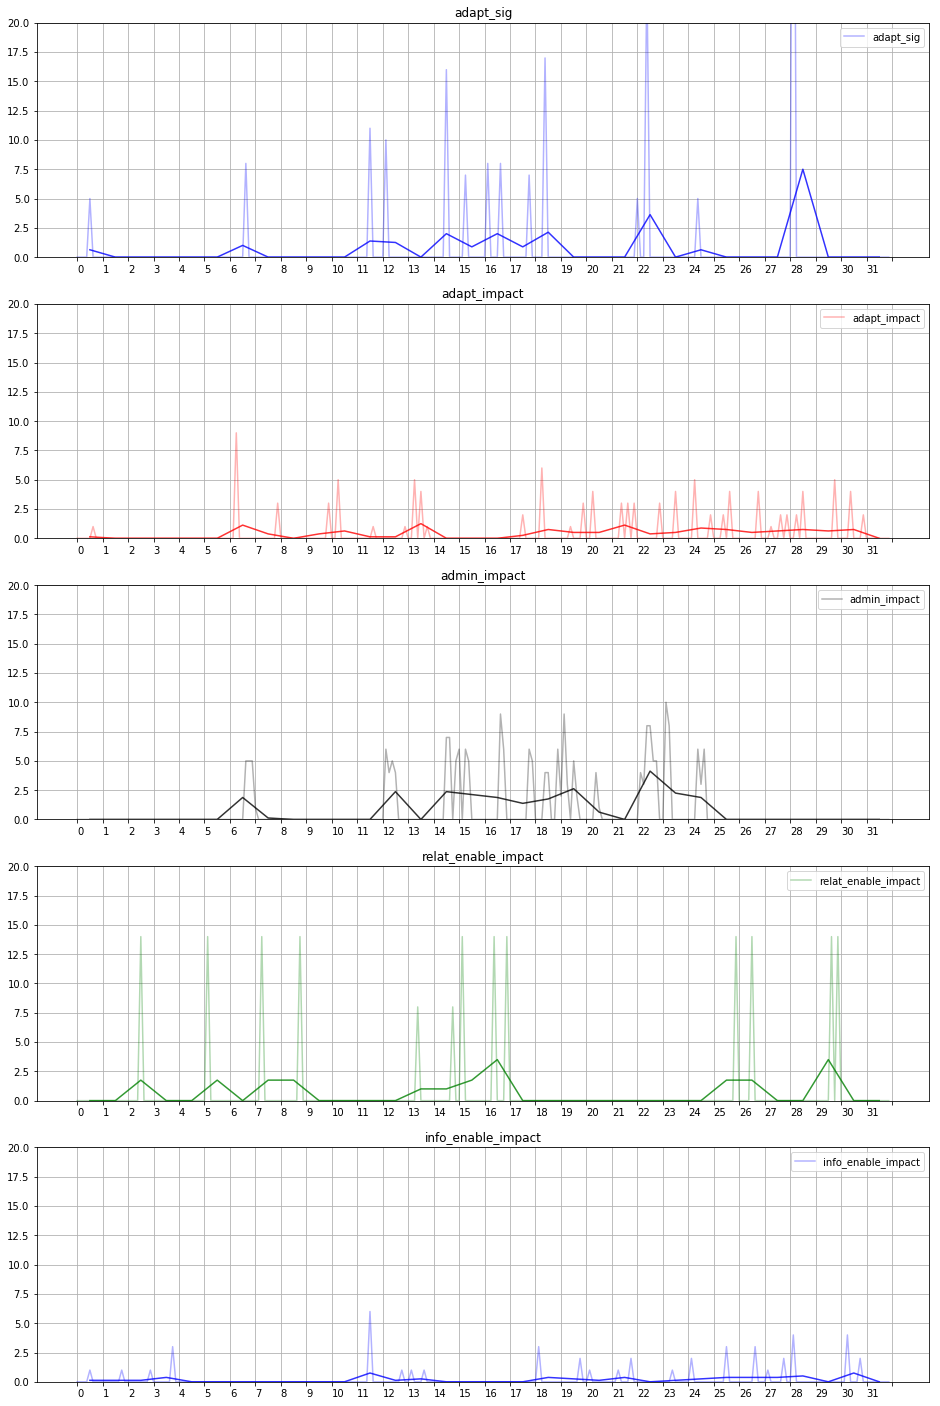

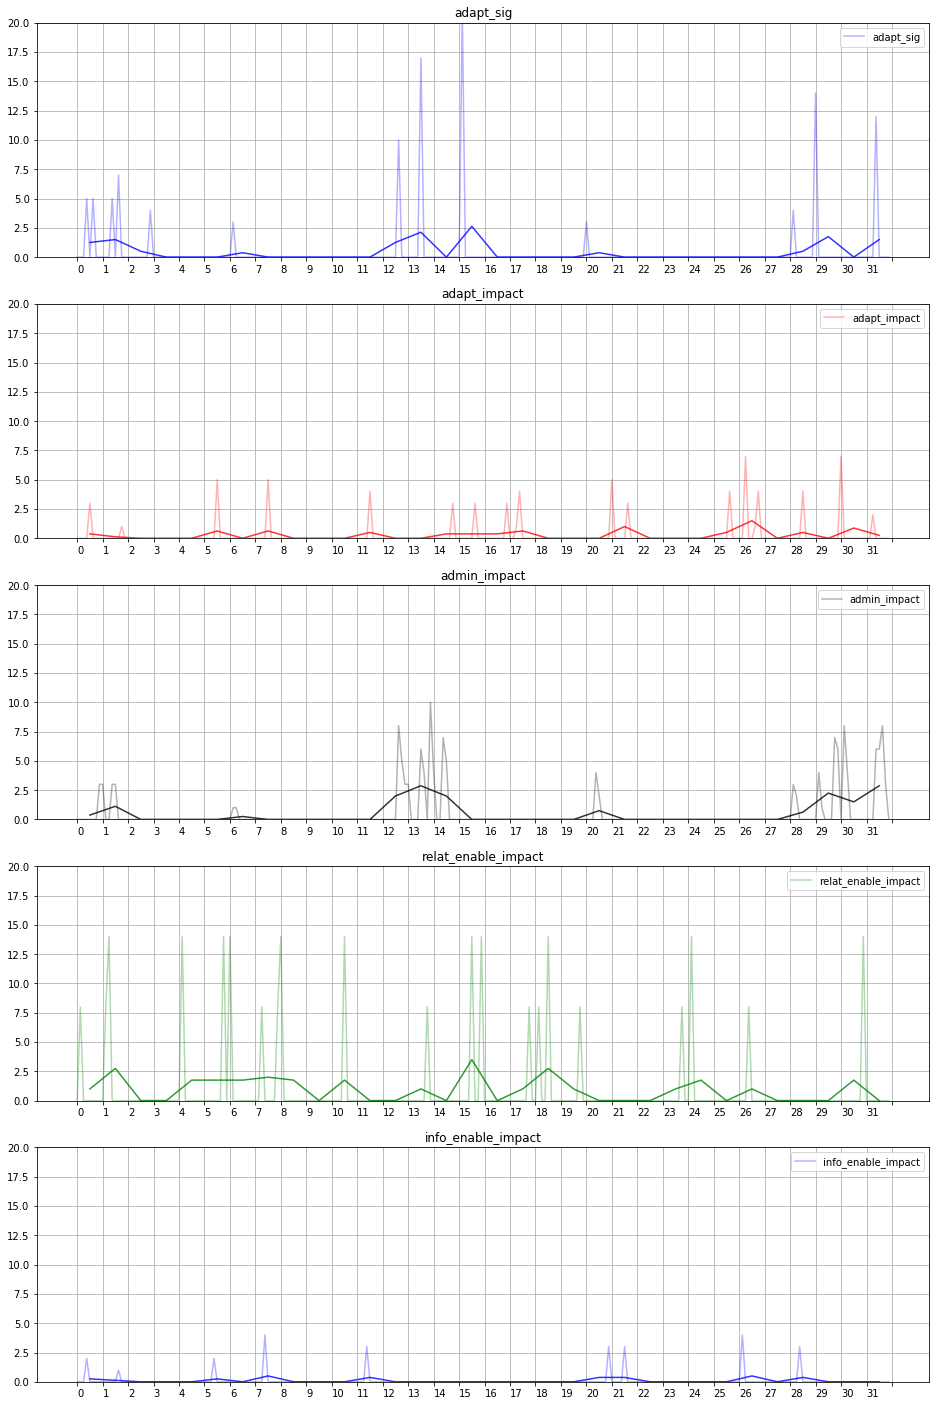

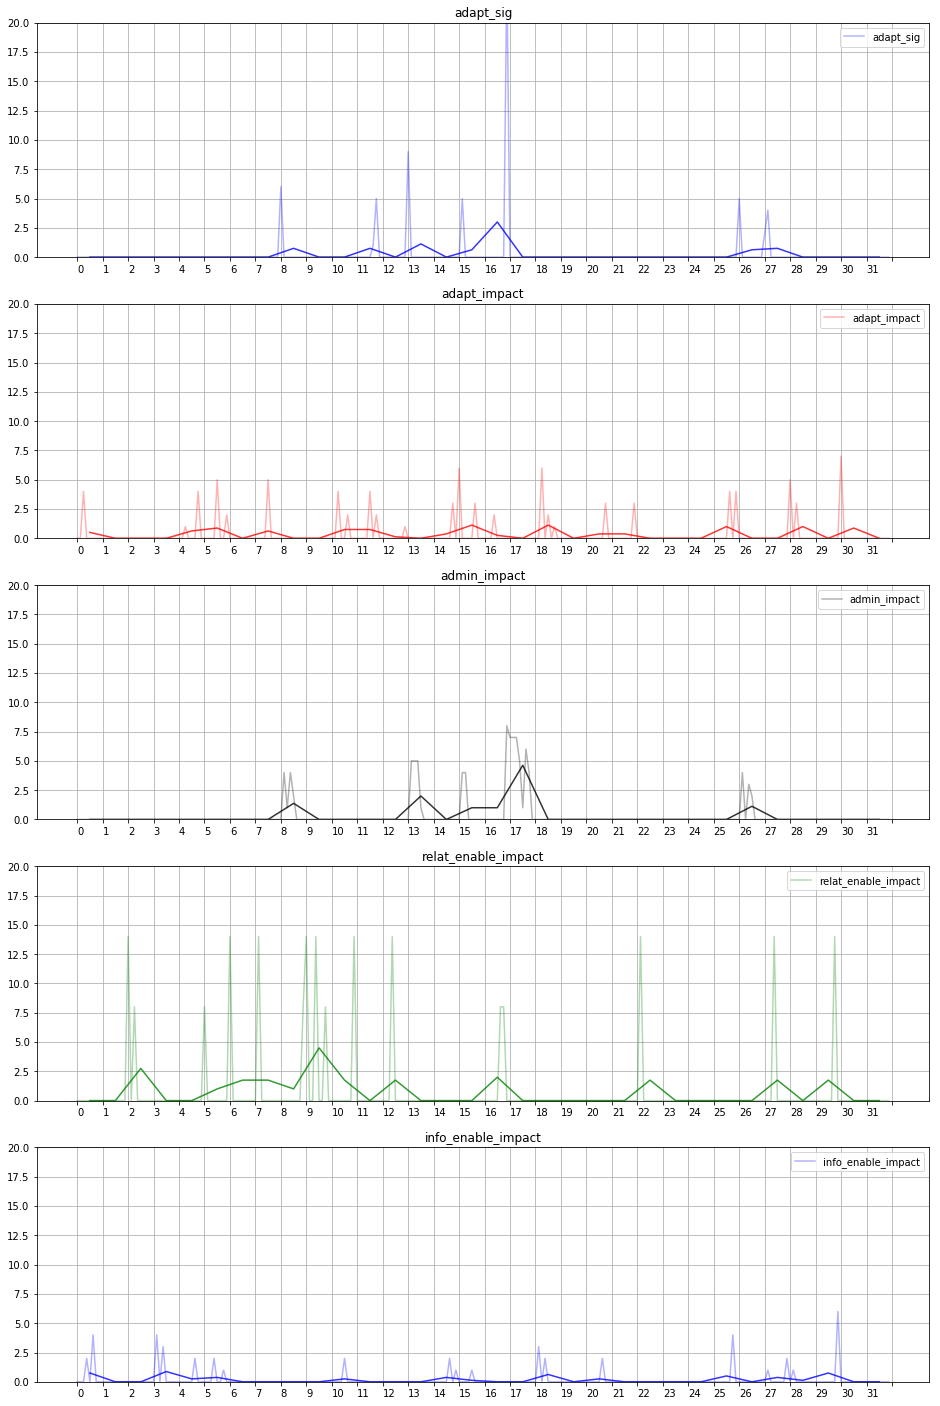

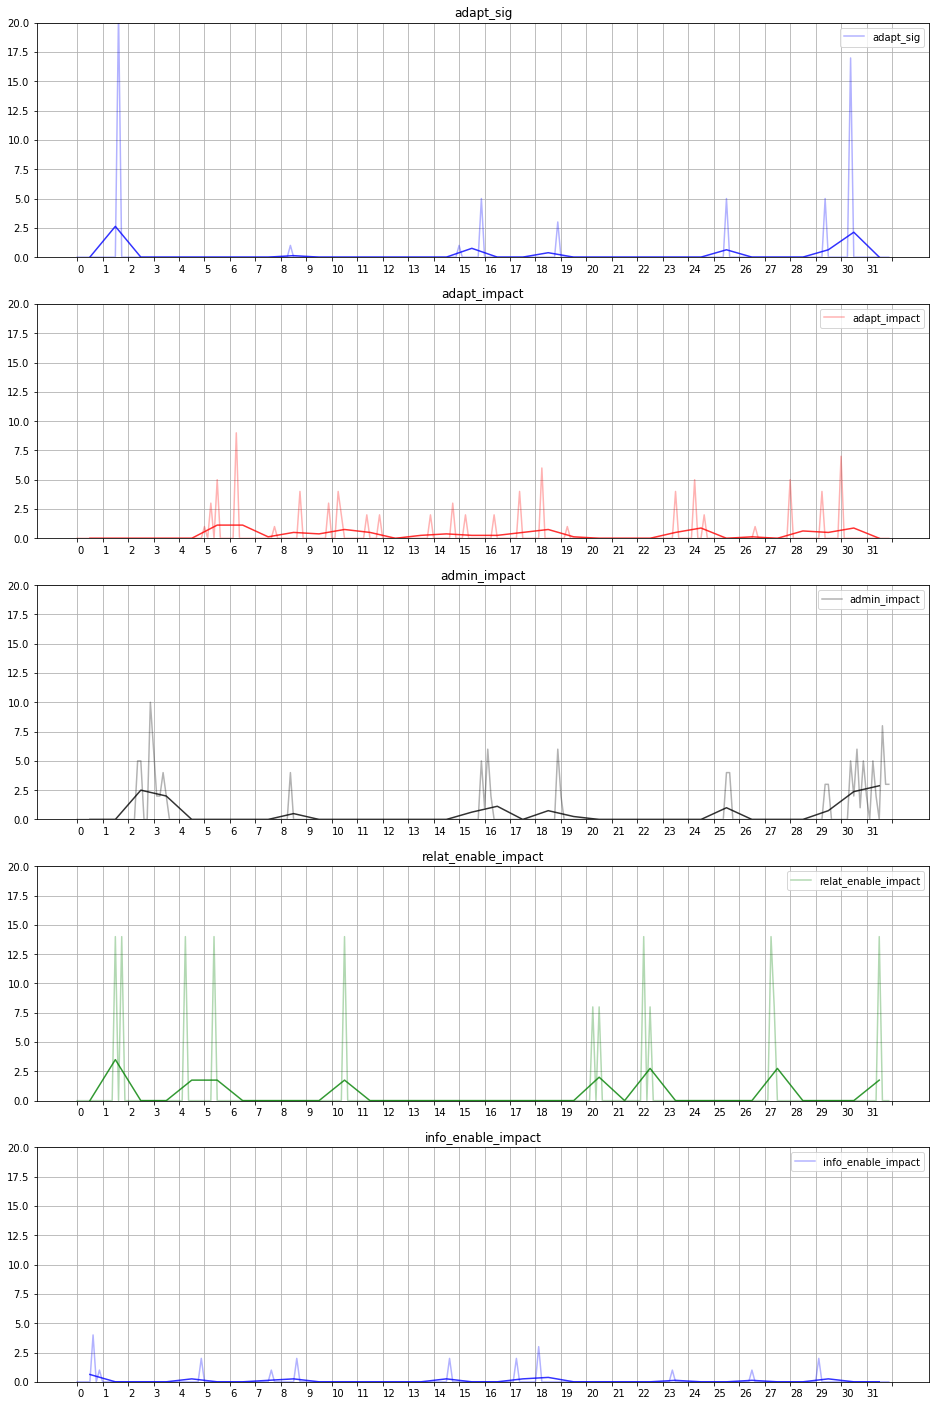

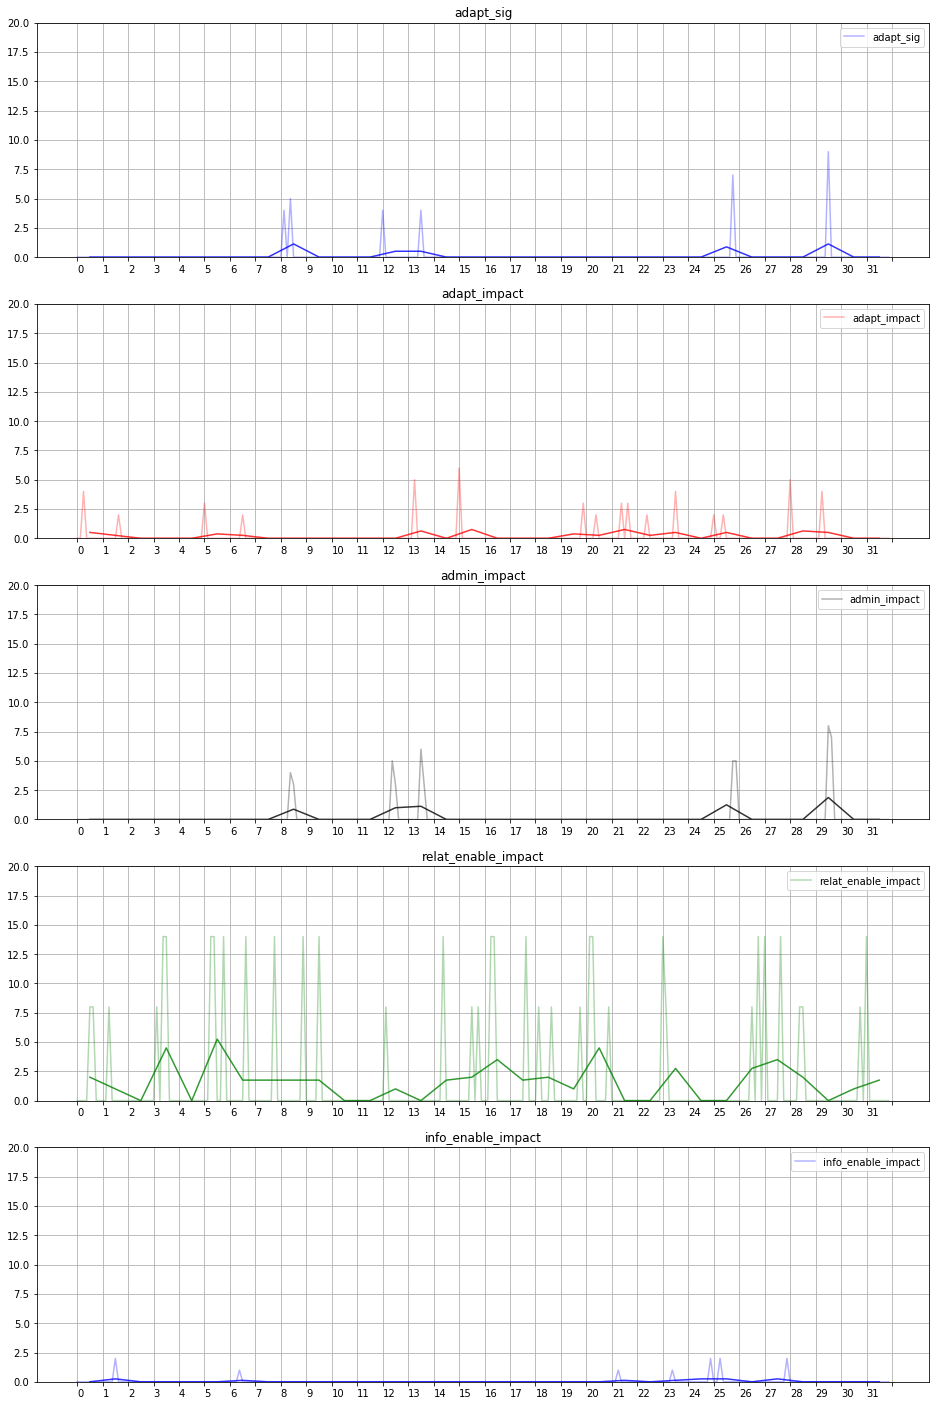

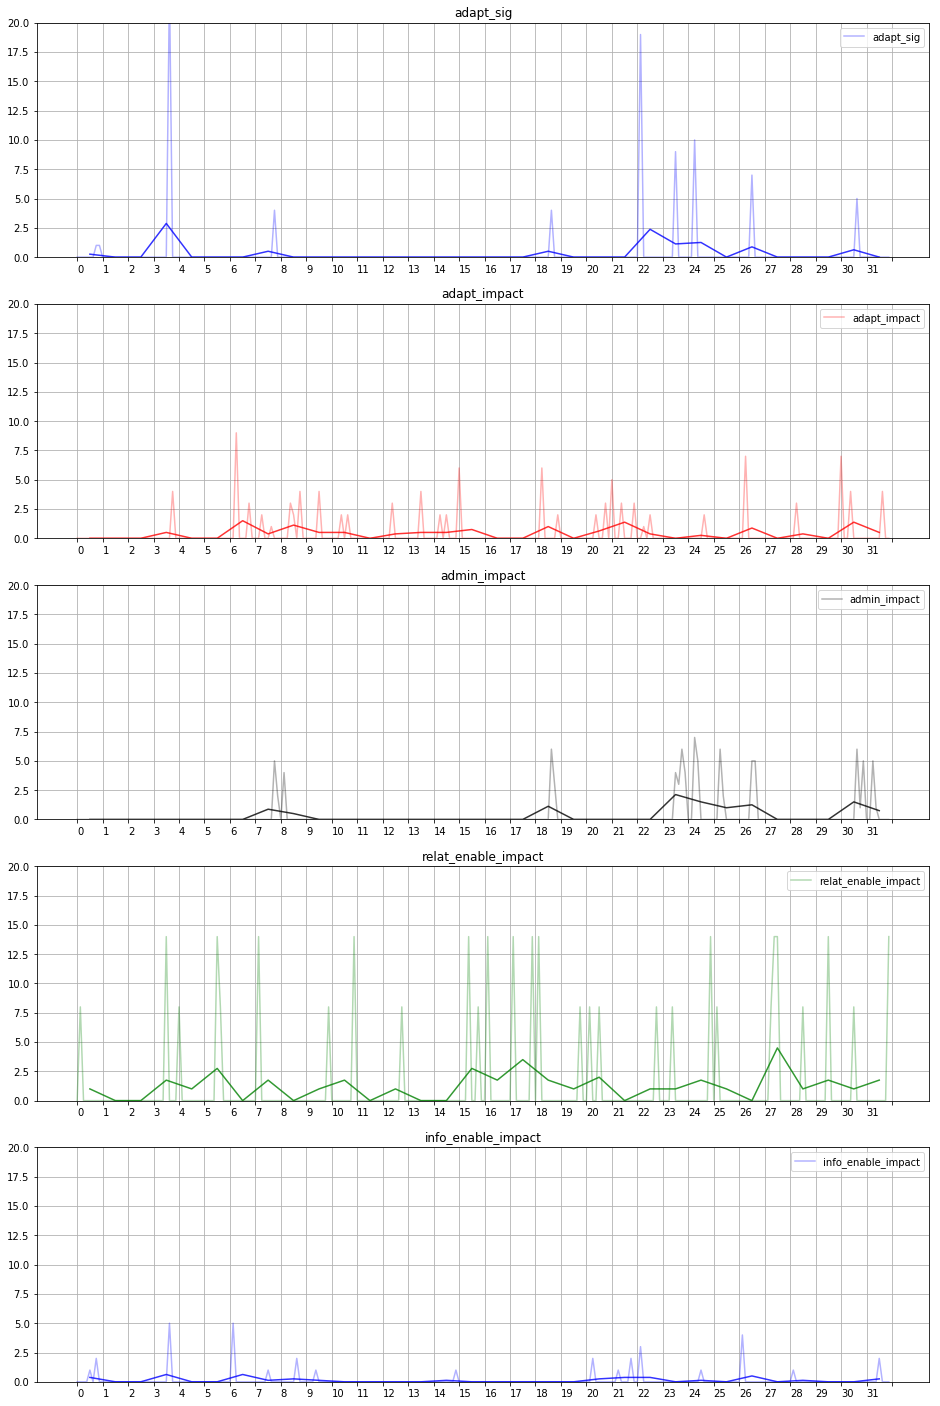

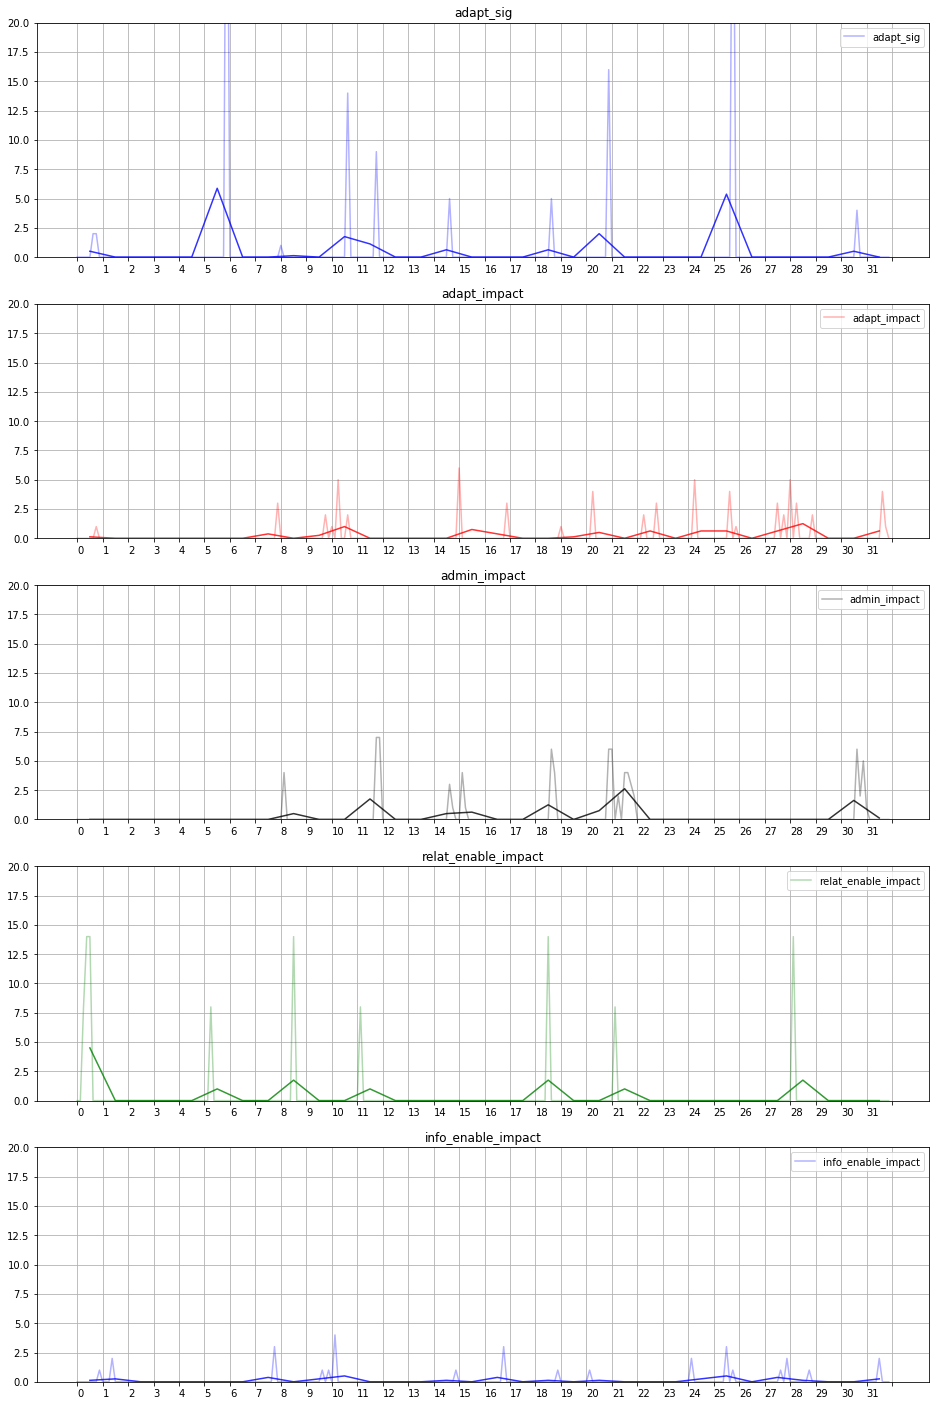

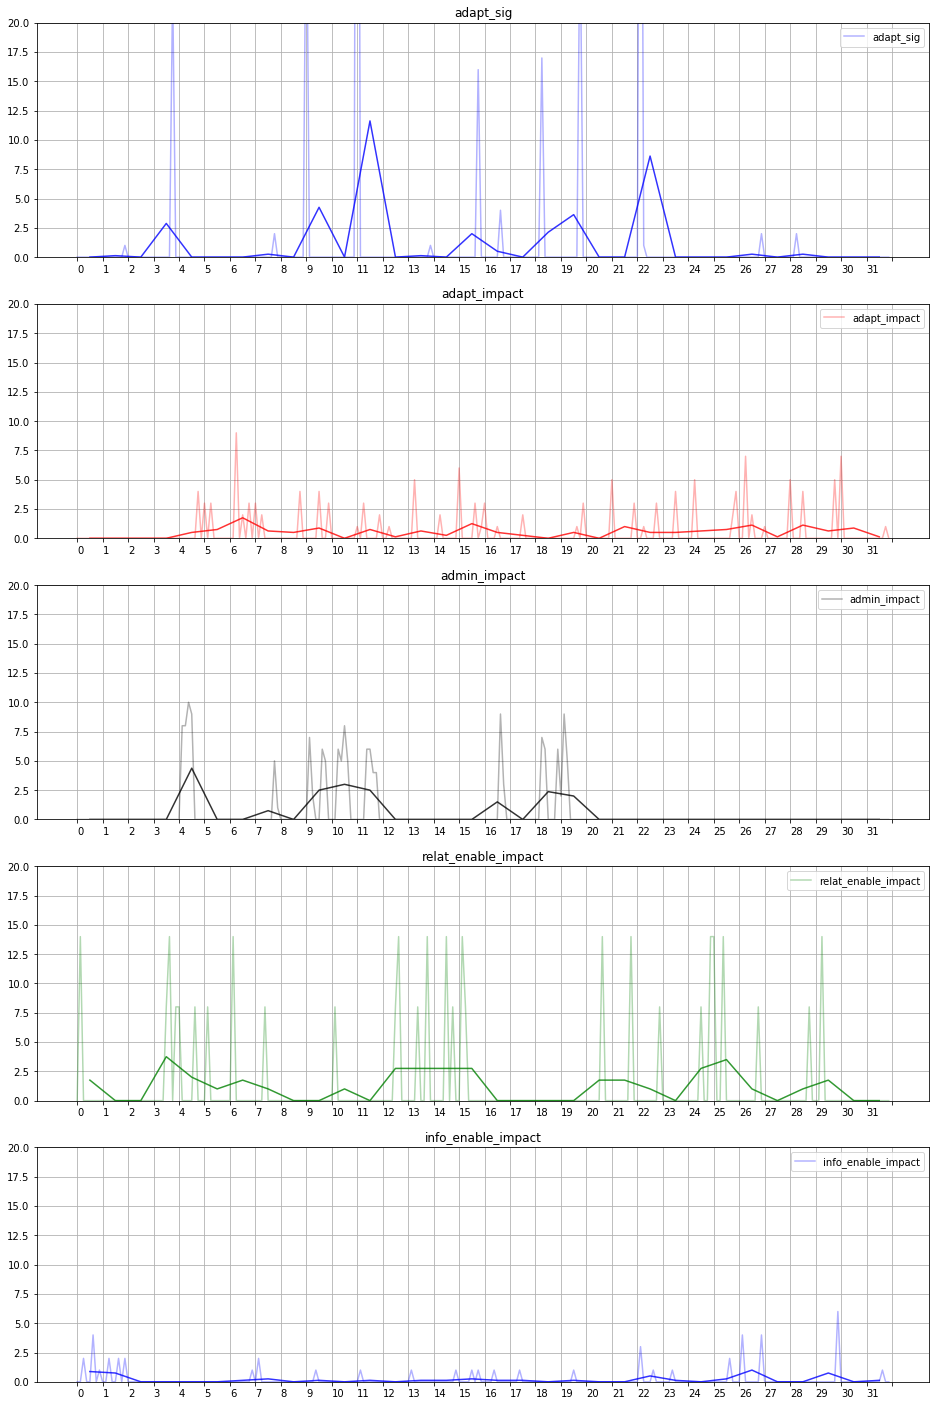

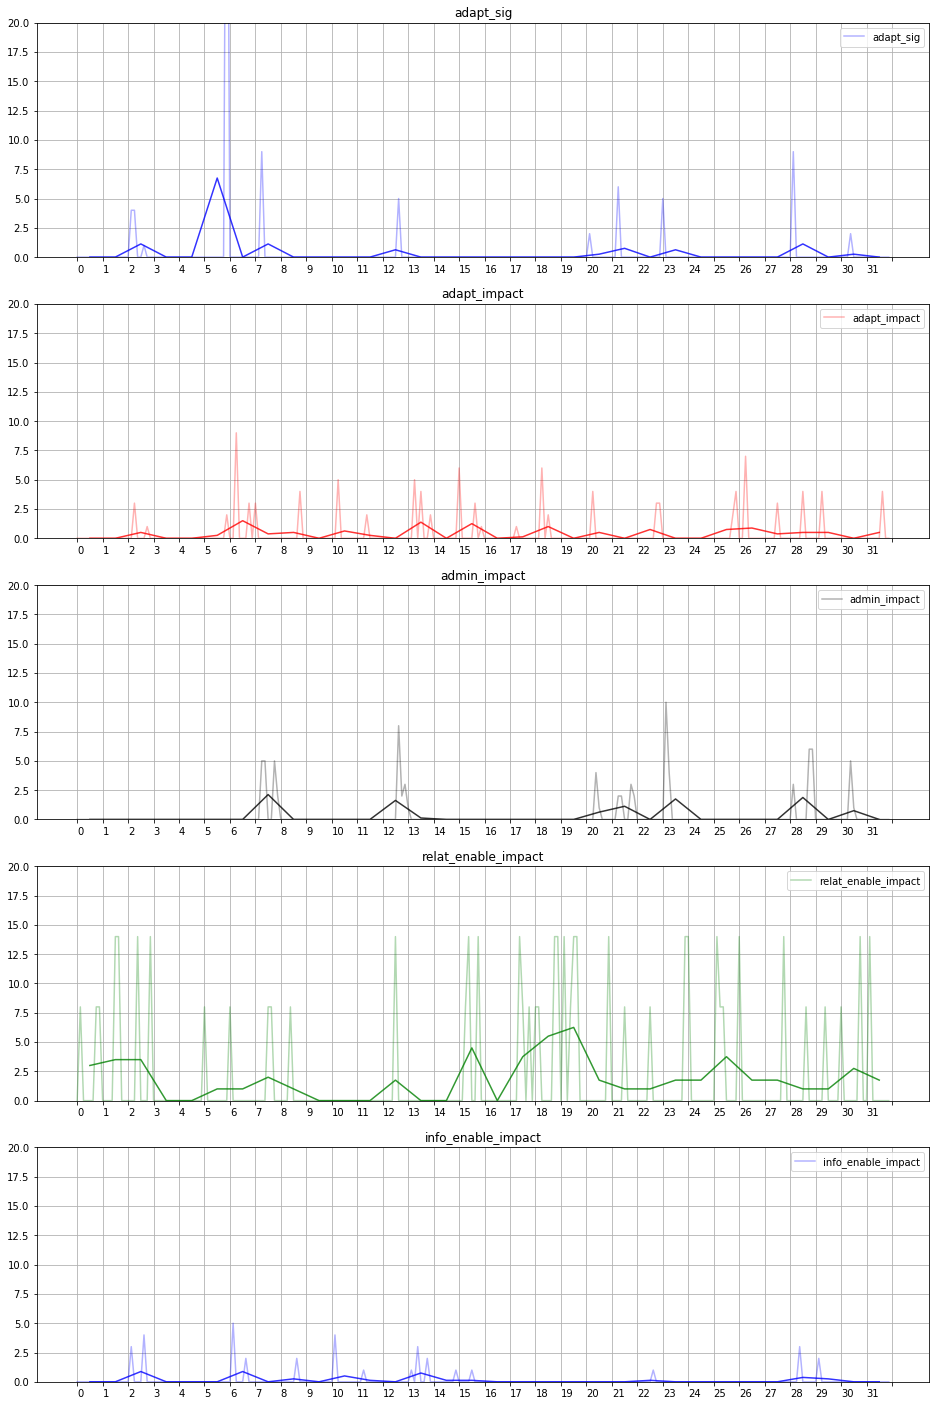

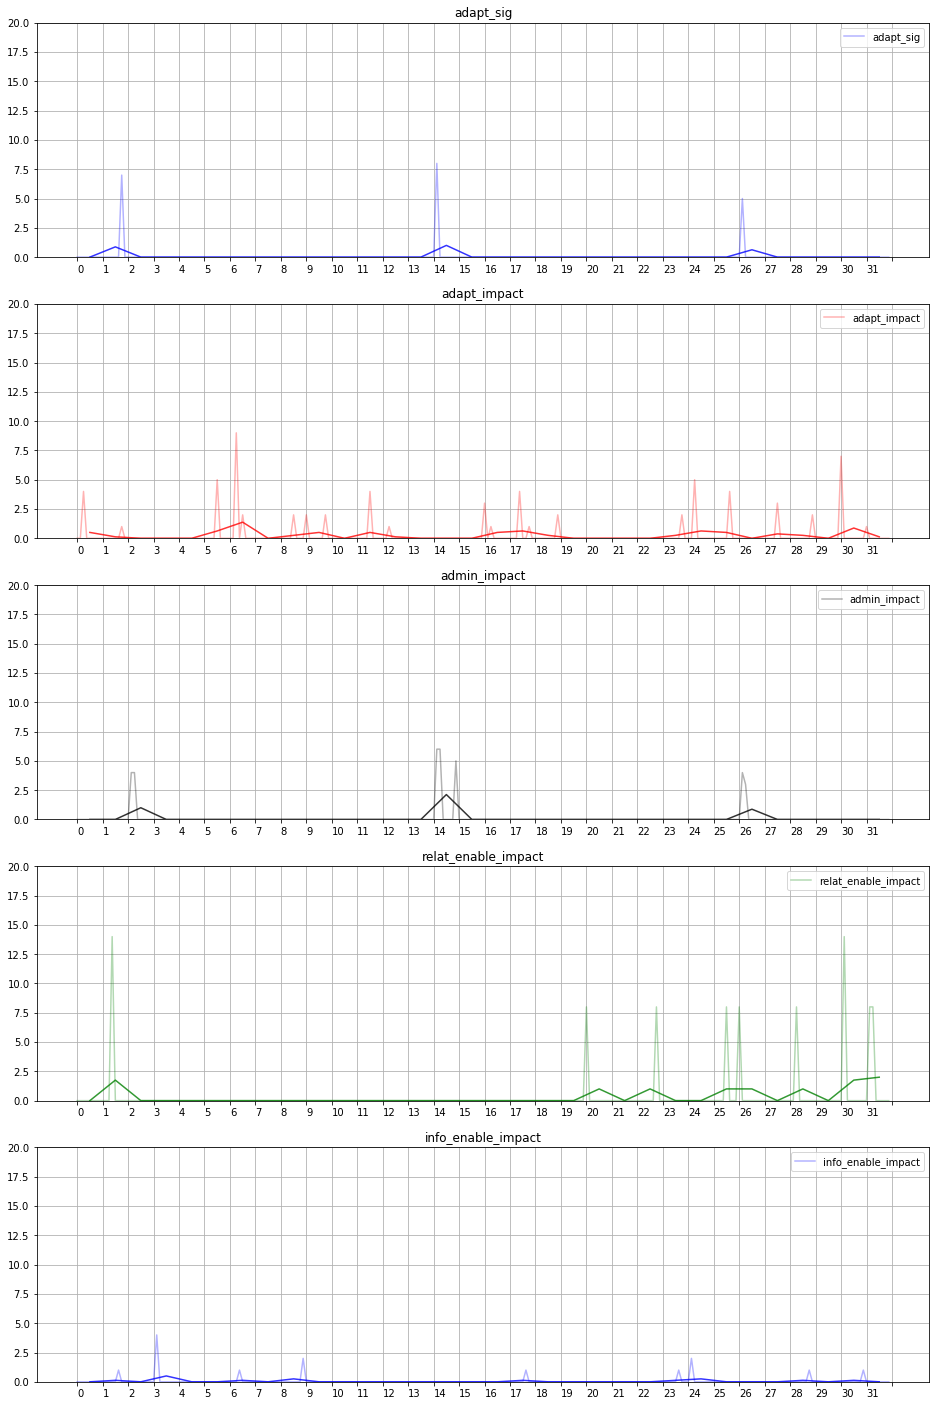

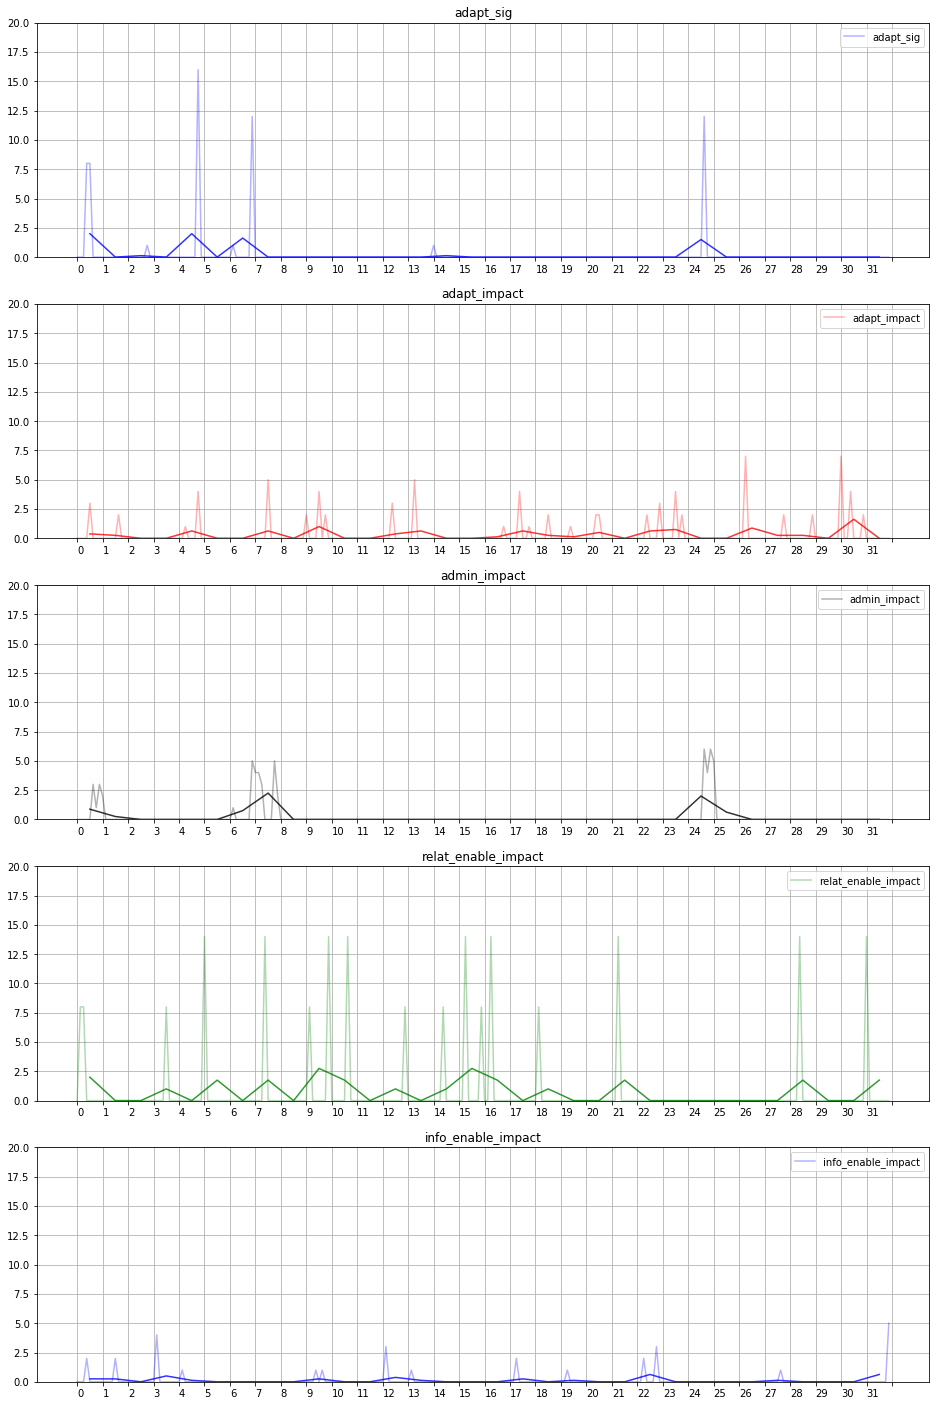

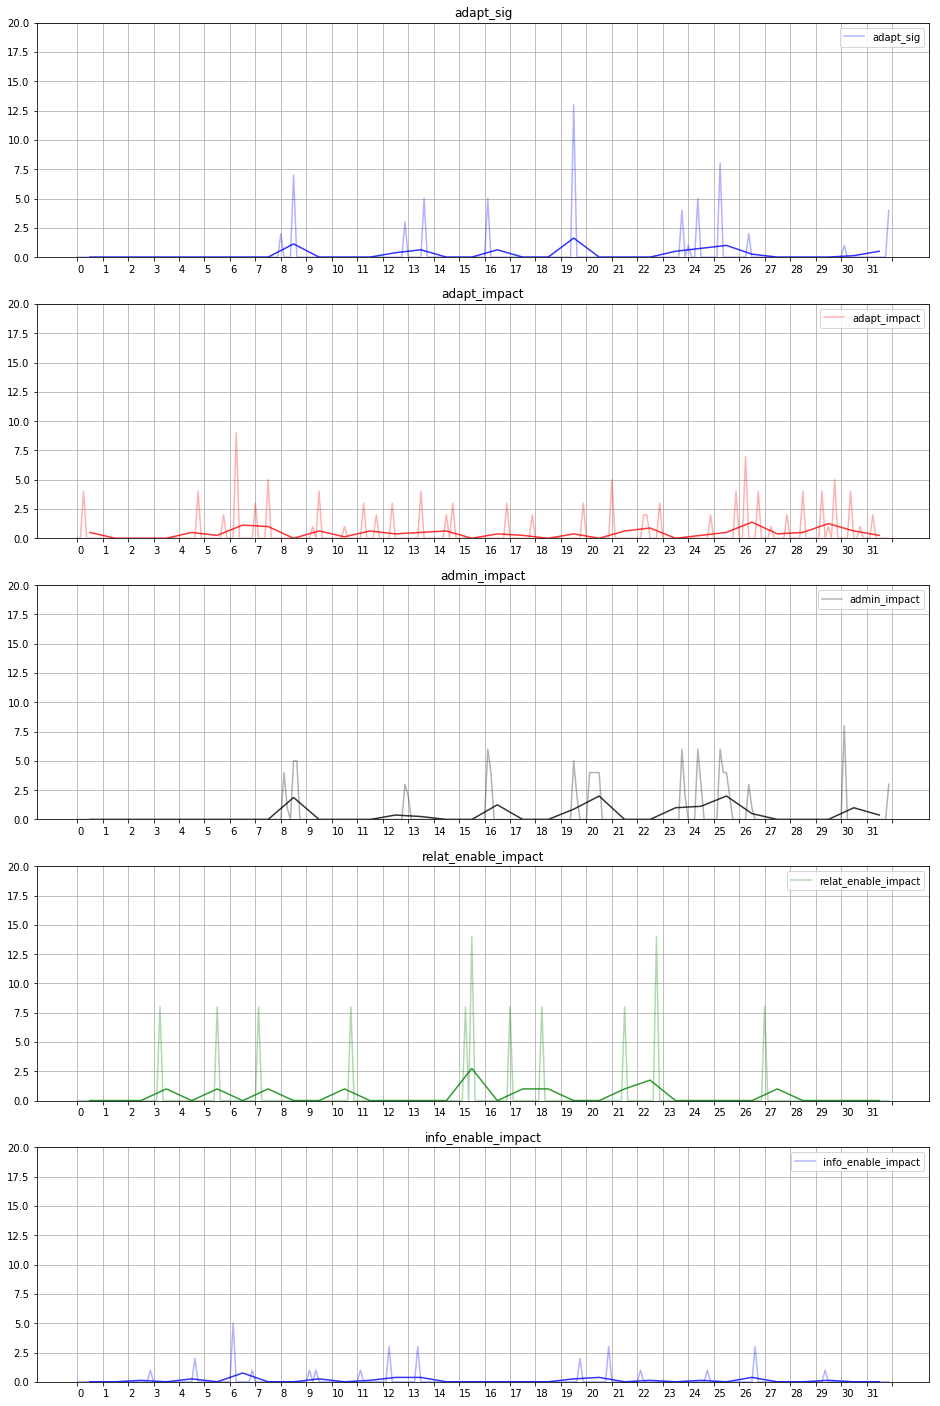

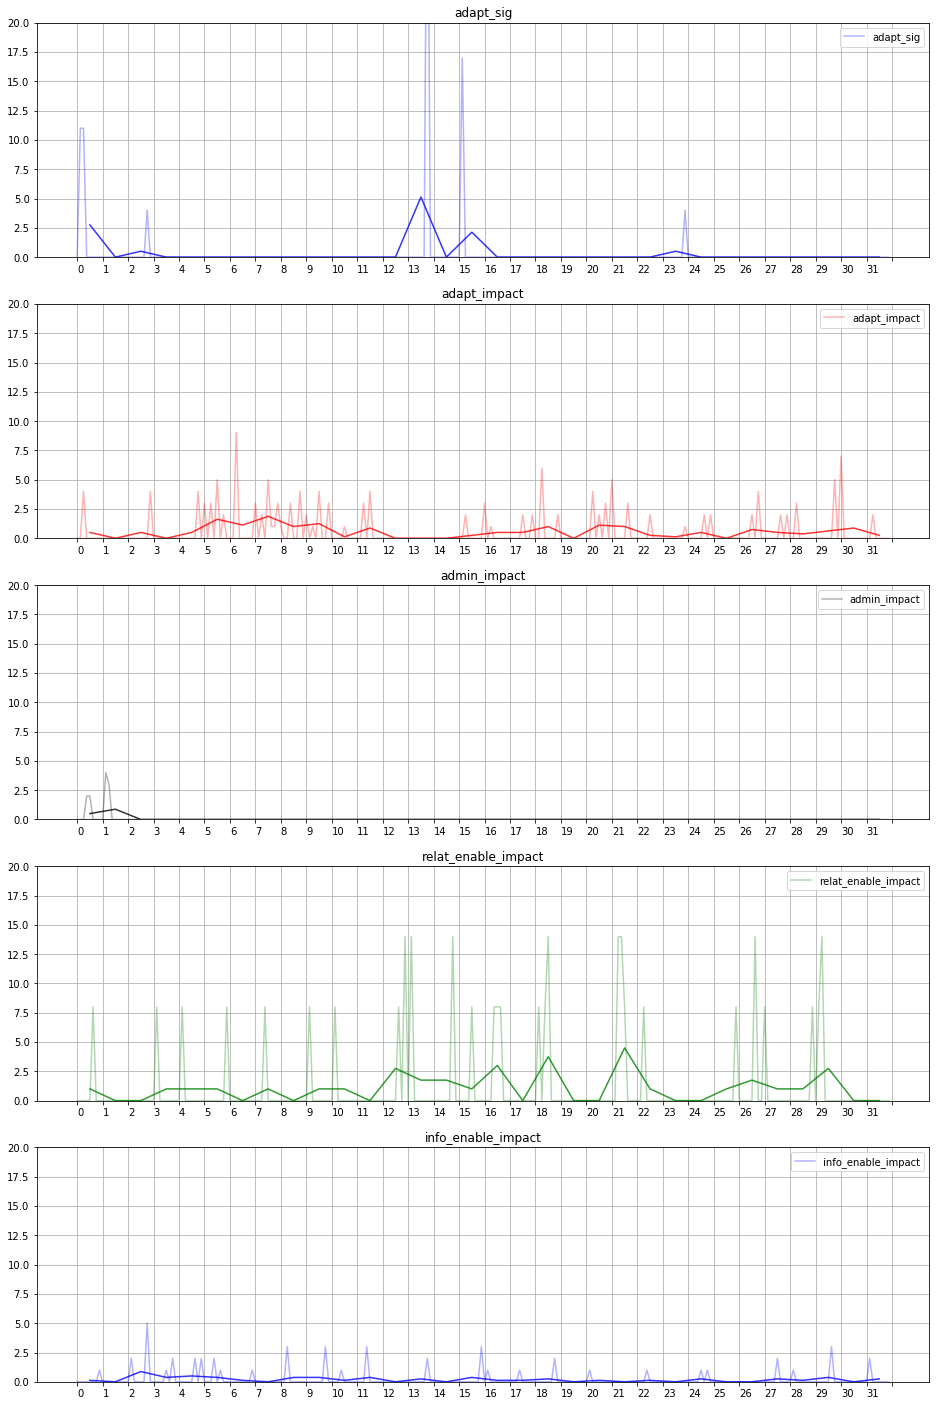

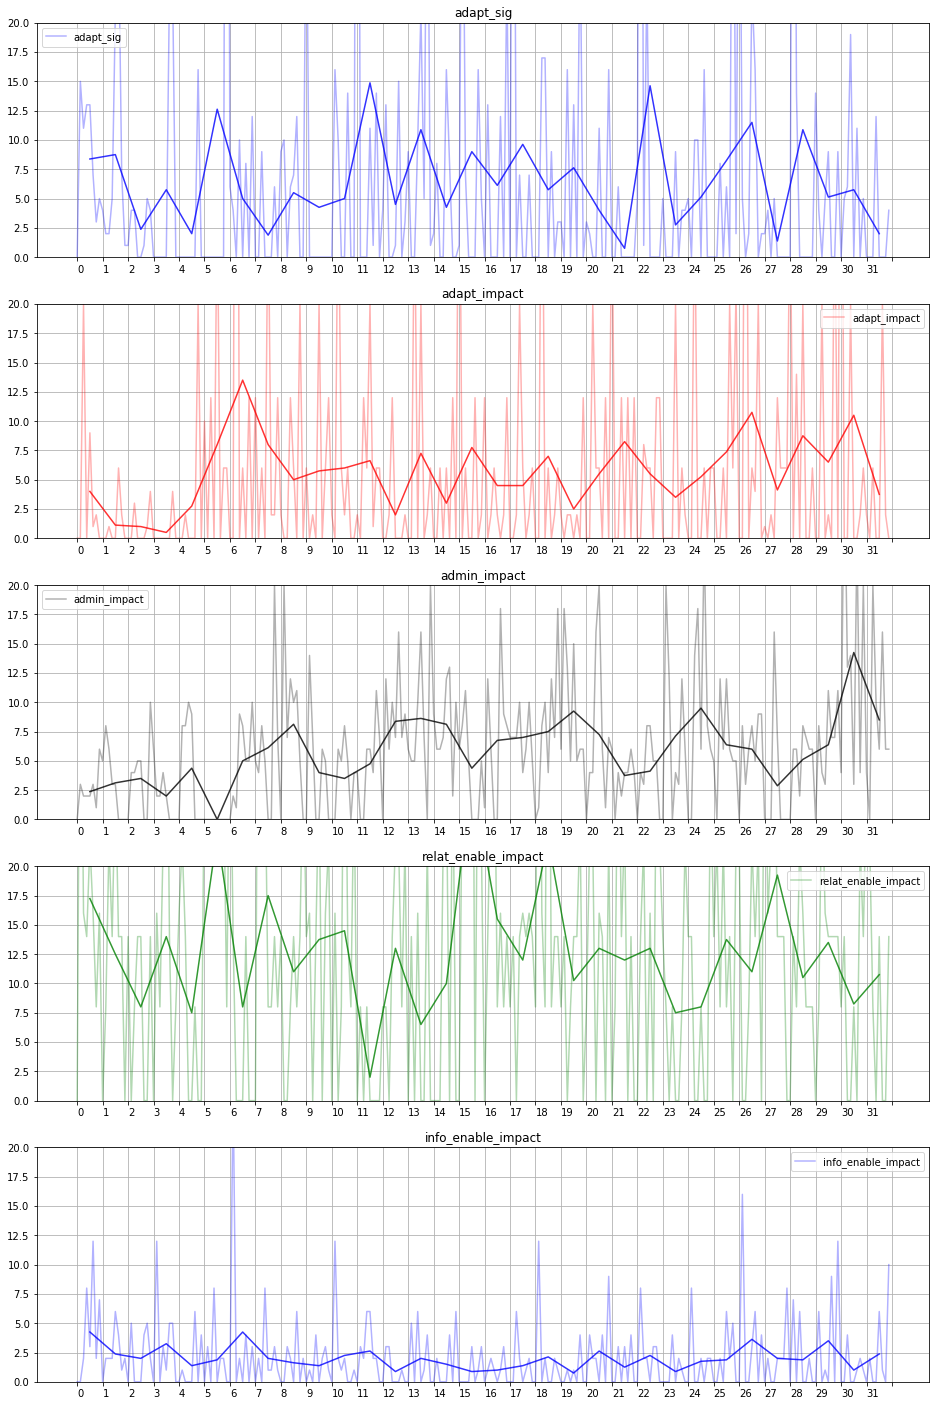

In [13]:
#绘制领导力折线图

for exp_name in exp_name_list:
    exp_dir = os.path.join(batch_dir, exp_name)
    bill_csv_path = os.path.join(exp_dir, exp_name + "_leadership_bill.csv")
    save_png_dir = os.path.join(exp_dir, "leadership_img")
    #print(bill_csv_path)
    try:
        os.makedirs(save_png_dir)
    except:
        pass
    for agent_id in list(range(NA)) + ['sum']:
        save_png_path=os.path.join(save_png_dir, exp_name + '_leadership_' + str(agent_id) + '.png')
        datas = [
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='adapt_sig'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='adapt_impact'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='admin_impact'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='relat_enable_impact'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='info_enable_impact'),
        ]
        #print(save_png_path)
        draw_concate(datas, group_num, ['blue', 'red', 'black', 'green', 'blue'],
                    ['adapt_sig','adapt_impact','admin_impact',  'relat_enable_impact','info_enable_impact'],
                    ylim_ranges = [(0,20), (0,20), (0,20), (0,20), (0,20)],
                    save_fig_path=save_png_path)
        print("[finish]:agent{id} leadership img".format(id=agent_id))

In [34]:
#绘制社会网络图

"""
==============
Weighted Graph
==============

An example using Graph as a weighted network.
"""
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx
import os

for exp_name in exp_name_list:
    exp_dir = os.path.join(batch_dir, exp_name)
    net_dir = os.path.join(exp_dir,"network")
    save_png_dir = os.path.join(exp_dir, "network_img")
    #print(bill_csv_path)
    try:
        os.makedirs(save_png_dir)
    except:
        pass
    pnet_fpath_list=[os.path.join(net_dir,netname) for netname in os.listdir(net_dir) if 'power' in netname]
    #print(pnet_fpath_list)
    
    for pnet_fpath in pnet_fpath_list:
        pnet_name = GetFileName(pnet_fpath)
        DrawNetGraph(pnet_fpath,pnet_name,save_png_dir,net_type="DiGraph")
        print("[finsh]:{netname} net graph img".format(netname=pnet_name))


[finsh]:power_0193 net graph img
[finsh]:power_0145 net graph img
[finsh]:power_0025 net graph img
[finsh]:power_0233 net graph img
[finsh]:power_0225 net graph img
[finsh]:power_0033 net graph img
[finsh]:power_0153 net graph img
[finsh]:power_0185 net graph img
[finsh]:power_0209 net graph img
[finsh]:power_0009 net graph img
[finsh]:power_0169 net graph img
[finsh]:power_0041 net graph img
[finsh]:power_0121 net graph img
[finsh]:power_0097 net graph img
[finsh]:power_0081 net graph img
[finsh]:power_0137 net graph img
[finsh]:power_0057 net graph img
[finsh]:power_0241 net graph img
[finsh]:power_0113 net graph img
[finsh]:power_0073 net graph img
[finsh]:power_0065 net graph img
[finsh]:power_0105 net graph img
[finsh]:power_0129 net graph img
[finsh]:power_0049 net graph img
[finsh]:power_0249 net graph img
[finsh]:power_0089 net graph img
[finsh]:power_0201 net graph img
[finsh]:power_0017 net graph img
[finsh]:power_0177 net graph img
[finsh]:power_0161 net graph img
[finsh]:po